<a href="https://colab.research.google.com/github/MostafaELFEEL/Machine-Learning-and-Deep-Learning-Projects/blob/main/CNN_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

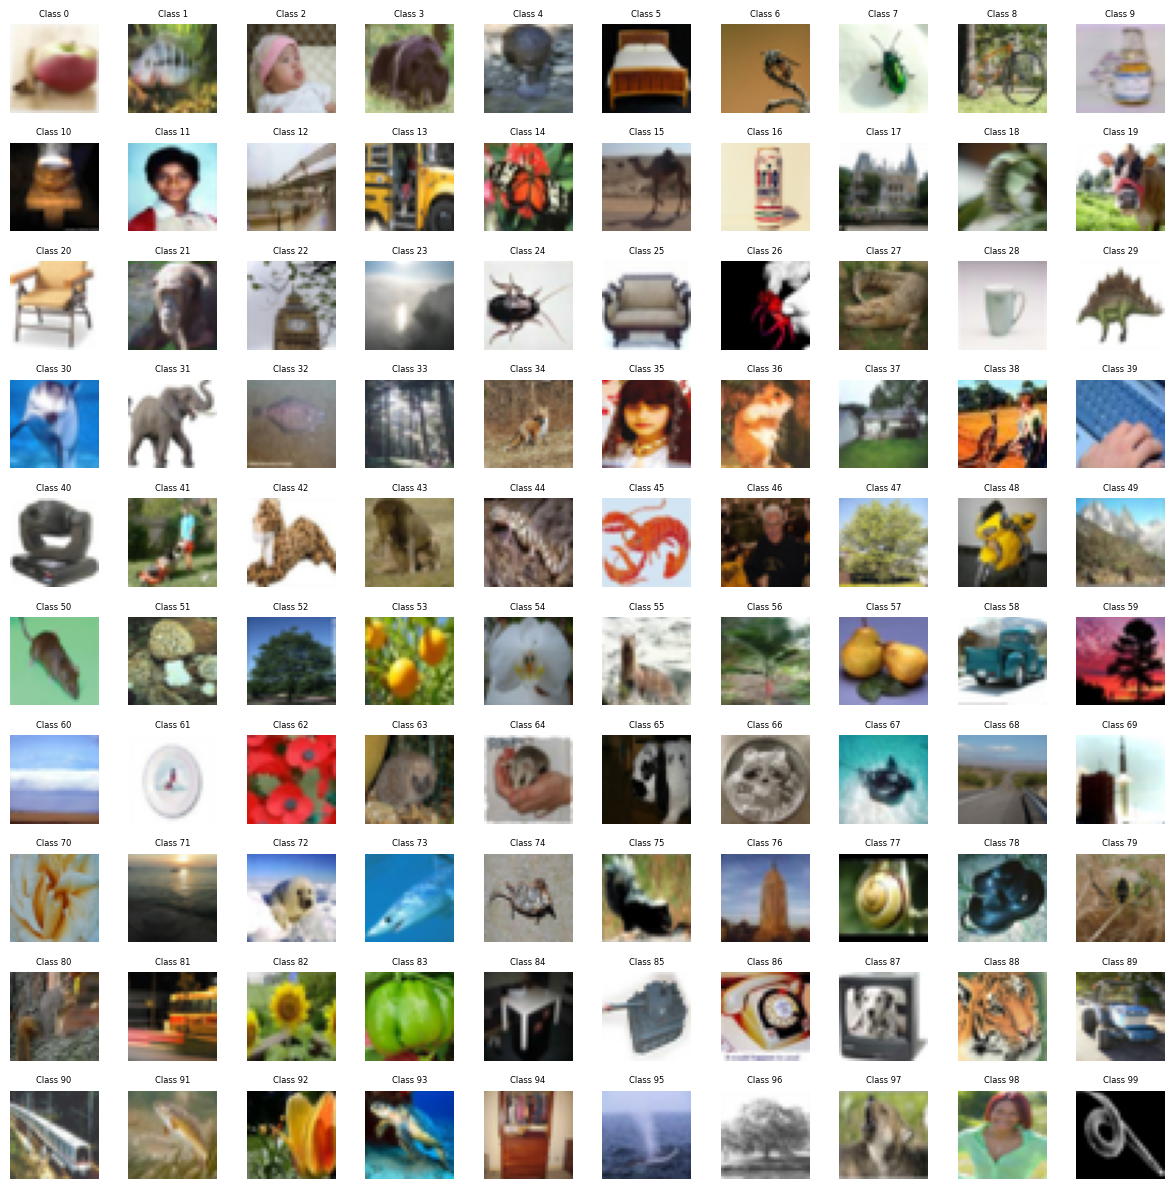

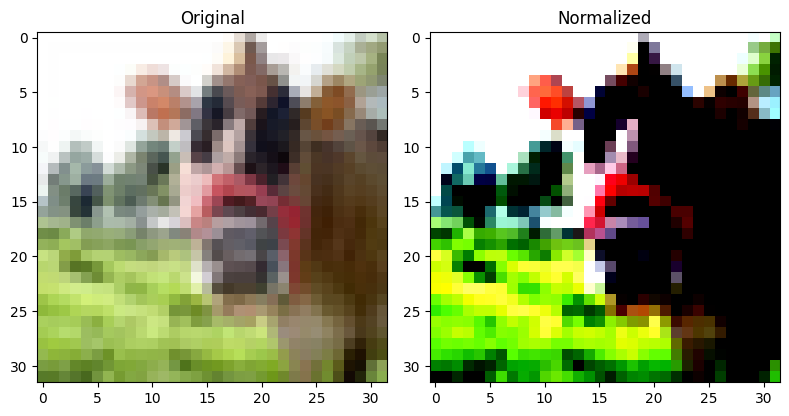

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time

# ---------------------------------------------------------
# Load CIFAR-100 Dataset
# ---------------------------------------------------------
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data()
train_labels = train_labels.ravel()
test_labels = test_labels.ravel()

# ---------------------------------------------------------
# Visualize 1 image per class
# ---------------------------------------------------------
plt.figure(figsize=(12, 12))
for i in range(100):
    for j in range(len(train_labels)):
        if train_labels[j] == i:
            plt.subplot(10, 10, i + 1)
            plt.imshow(train_images[j])
            plt.title(f"Class {train_labels[j].item()}", fontsize=6)
            plt.axis('off')
            break
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# Normalize per channel (standard practice)
# ---------------------------------------------------------
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

mean = np.mean(train_images, axis=(0, 1, 2))
std = np.std(train_images, axis=(0, 1, 2))

train_images_norm = (train_images - mean) / std
test_images_norm = (test_images - mean) / std

# ---------------------------------------------------------
# Visualize example before and after normalization
# ---------------------------------------------------------
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(train_images[0])
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(train_images_norm[0])
plt.title("Normalized")

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# Train / Validation Split
# ---------------------------------------------------------
X_train, X_val = train_images_norm[:40000], train_images_norm[40000:]
y_train, y_val = train_labels[:40000], train_labels[40000:]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,420 (907.89 KB)

 Trainable params: 232,420 (907.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.0316 - loss: 4.5013 - val_accuracy: 0.1255 - val_loss: 3.8607
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.0982 - loss: 3.9511 - val_accuracy: 0.1791 - val_loss: 3.5263
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1381 - loss: 3.7032 - val_accuracy: 0.2136 - val_loss: 3.3638
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1655 - loss: 3.5278 - val_accuracy: 0.2388 - val_loss: 3.1973
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1924 - loss: 3.3849 - val_accuracy: 0.2601 - val_loss: 3.1119
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2099 - loss: 3.2861 - val_accuracy: 0.2775 - val_loss: 3.0451
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2254 - loss: 3.1884 - val_accuracy: 0.2849 - val_loss: 2.9767
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2399 - loss: 3.1242 - val_acc

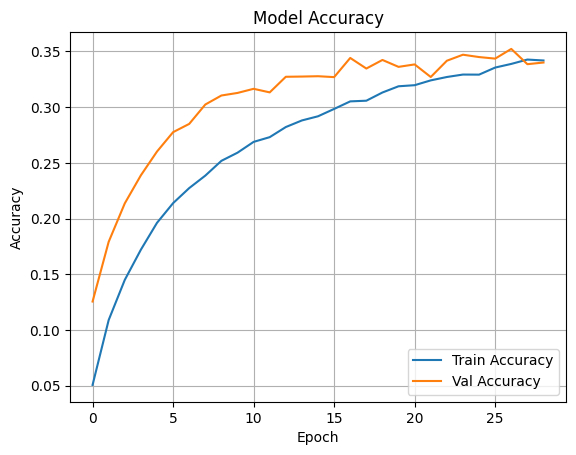

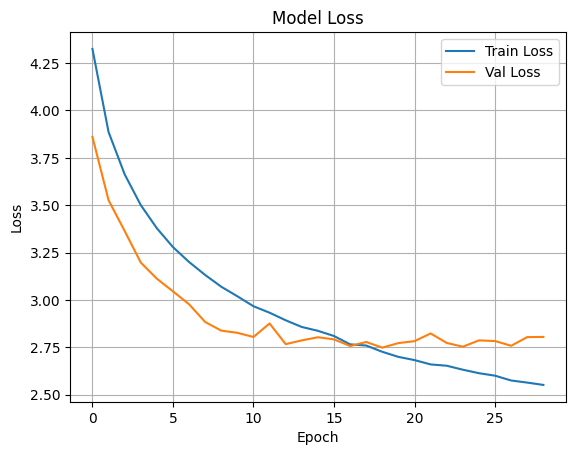

In [8]:
# ---------------------------------------------------------
# CNN Model Definition
# ---------------------------------------------------------
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(100, activation='softmax')
])

model.summary()

# ---------------------------------------------------------
# Compile and Configure Training
# ---------------------------------------------------------
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

early_stop = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
# ---------------------------------------------------------
# Training
# ---------------------------------------------------------
start = time.time()
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    batch_size=64
)
end = time.time()
print(f"Training completed in {end - start:.2f} seconds")

# ---------------------------------------------------------
# Evaluation
# ---------------------------------------------------------
test_loss, test_acc = model.evaluate(test_images_norm, test_labels, verbose=2)
print("Test Accuracy:", round(test_acc * 100, 2), "%")

# ---------------------------------------------------------
# Prediction
# ---------------------------------------------------------
predictions = model.predict(test_images_norm)

# ---------------------------------------------------------
# Visualization: Accuracy & Loss
# ---------------------------------------------------------
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.grid(True)
plt.show()